In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn')
%matplotlib inline

In [2]:
from problem import make_problem
from viz import make_plot, make_meshgrid

In [3]:
N_SAMPLES = 10000
TEST_SIZE = 0.1
H = .02  # step size in the mesh

X_train, X_test, y_train, y_test = make_problem(N_SAMPLES, TEST_SIZE)

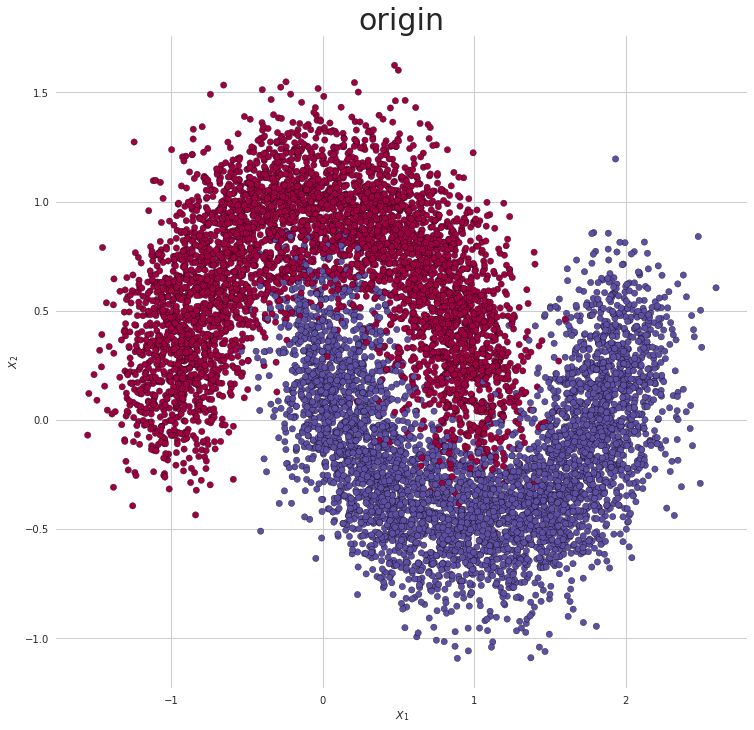

In [4]:
make_plot(X_train, y_train, "origin")

In [5]:
from train_by_numpy import train, full_forward_propagation, get_accuracy_value

In [6]:
NN_ARCHITECTURE = [
    {"input_dim": 2, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 1, "activation": "sigmoid"},
]

# Training
params_values, cost_history, accuracy_history = train(
    np.transpose(X_train),
    np.transpose(y_train.reshape((y_train.shape[0], 1))),
    NN_ARCHITECTURE,
    2000,
    0.01,
    verbose=True)

Iteration: 00000 - cost: 0.69363 - accuracy: 0.50189
Iteration: 00100 - cost: 0.69343 - accuracy: 0.50189
Iteration: 00200 - cost: 0.69332 - accuracy: 0.50189
Iteration: 00300 - cost: 0.69325 - accuracy: 0.50189
Iteration: 00400 - cost: 0.69321 - accuracy: 0.50189
Iteration: 00500 - cost: 0.69318 - accuracy: 0.50189
Iteration: 00600 - cost: 0.69316 - accuracy: 0.50189
Iteration: 00700 - cost: 0.69315 - accuracy: 0.50189
Iteration: 00800 - cost: 0.69315 - accuracy: 0.50189
Iteration: 00900 - cost: 0.69315 - accuracy: 0.50189
Iteration: 01000 - cost: 0.69314 - accuracy: 0.50189
Iteration: 01100 - cost: 0.69314 - accuracy: 0.50189
Iteration: 01200 - cost: 0.69314 - accuracy: 0.50189
Iteration: 01300 - cost: 0.69314 - accuracy: 0.50189
Iteration: 01400 - cost: 0.69314 - accuracy: 0.50189
Iteration: 01500 - cost: 0.69314 - accuracy: 0.50189
Iteration: 01600 - cost: 0.69314 - accuracy: 0.50189
Iteration: 01700 - cost: 0.69314 - accuracy: 0.50189
Iteration: 01800 - cost: 0.69314 - accuracy: 0

In [7]:
# Prediction
Y_test_hat, _ = full_forward_propagation(np.transpose(X_test), params_values, NN_ARCHITECTURE)

# Accuracy achieved on the test set
acc_test = get_accuracy_value(Y_test_hat, np.transpose(y_test.reshape((y_test.shape[0], 1))))
print("Test set accuracy: {:.2f} - David".format(acc_test))



Test set accuracy: 0.48 - David


In [14]:
xx, yy, mesh_reshaped = make_meshgrid(X_test, 0.2)
print(mesh_reshaped.shape)
Z, _ = full_forward_propagation(np.transpose(mesh_reshaped), params_values, NN_ARCHITECTURE)
Z = np.transpose(Z)
print(Z.shape)
Z[:5]

(468, 2)
(468, 1)


array([[0.49800678],
       [0.49800678],
       [0.49800678],
       [0.49800678],
       [0.49800678]])

/home/curt/projects/pytorch-first/back_propagation_numpy/viz.py:24: UserWarning: No contour levels were found within the data range.
  plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)


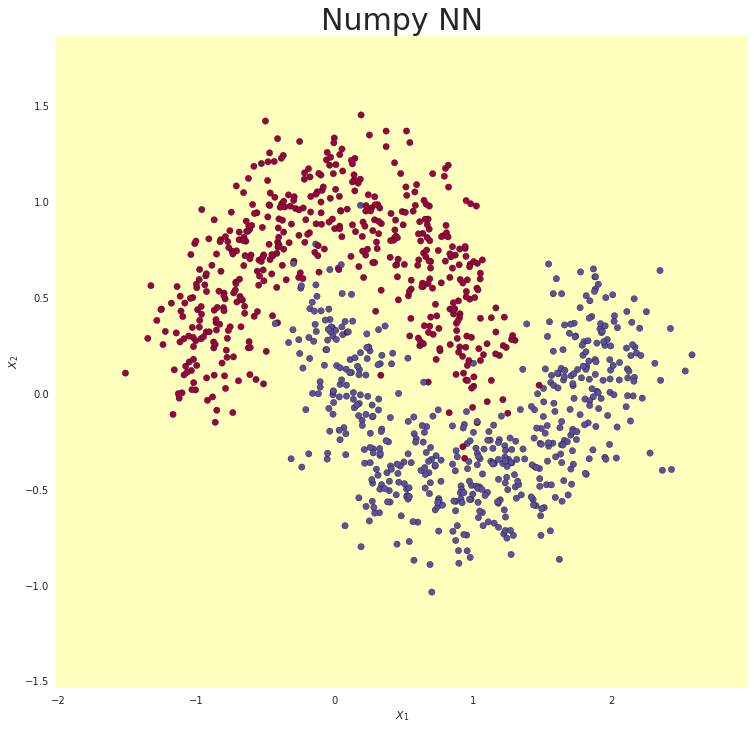

In [15]:
make_plot(X_test, y_test, "Numpy NN", XX=xx, YY=yy, preds=Z)

In [ ]:
s